In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
FlightTime = pd.read_csv("FlightTime.csv")
print(FlightTime)

    Flight Date Carrier  Flight Number Origin Destination  Departure Time  \
0     11/1/2015      AA            111    ORD         LAX          1709.0   
1     11/1/2015      AA           1092    ORD         LAX          2021.0   
2     11/1/2015      AA           1081    ORD         LAX           841.0   
3     11/1/2015      AA           1243    ORD         LAX           705.0   
4     11/1/2015      AA           1358    ORD         LAX          1508.0   
..          ...     ...            ...    ...         ...             ...   
738  11/30/2015      UA           1098    ORD         LAX           611.0   
739  11/30/2015      UA           1440    ORD         LAX          2247.0   
740  11/30/2015      VX            231    ORD         LAX           732.0   
741  11/30/2015      VX            241    ORD         LAX          1715.0   
742  11/30/2015      UA            204    ORD         LAX             NaN   

     Departure Delay  Arrival Time  Arrival Delay  Flight Time  
0         

In [25]:
print(FlightTime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flight Date      743 non-null    object 
 1   Carrier          743 non-null    object 
 2   Flight Number    743 non-null    int64  
 3   Origin           743 non-null    object 
 4   Destination      743 non-null    object 
 5   Departure Time   731 non-null    float64
 6   Departure Delay  731 non-null    float64
 7   Arrival Time     729 non-null    float64
 8   Arrival Delay    729 non-null    float64
 9   Flight Time      743 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 58.2+ KB
None


In [27]:
FlightTime = FlightTime.dropna(subset = ['Arrival Time', 'Departure Time'])
print(FlightTime.info())

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 741
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Flight Date      729 non-null    object 
 1   Carrier          729 non-null    object 
 2   Flight Number    729 non-null    int64  
 3   Origin           729 non-null    object 
 4   Destination      729 non-null    object 
 5   Departure Time   729 non-null    float64
 6   Departure Delay  729 non-null    float64
 7   Arrival Time     729 non-null    float64
 8   Arrival Delay    729 non-null    float64
 9   Flight Time      729 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 62.6+ KB
None


In [32]:
for x in FlightTime.index:
    if (FlightTime.loc[x, 'Flight Time'] < 230):
        FlightTime = FlightTime.drop(x, inplace = True)
print(FlightTime)

    Flight Date Carrier  Flight Number Origin Destination  Departure Time  \
0     11/1/2015      AA            111    ORD         LAX          1709.0   
1     11/1/2015      AA           1092    ORD         LAX          2021.0   
2     11/1/2015      AA           1081    ORD         LAX           841.0   
3     11/1/2015      AA           1243    ORD         LAX           705.0   
4     11/1/2015      AA           1358    ORD         LAX          1508.0   
..          ...     ...            ...    ...         ...             ...   
737  11/30/2015      UA            793    ORD         LAX          1610.0   
738  11/30/2015      UA           1098    ORD         LAX           611.0   
739  11/30/2015      UA           1440    ORD         LAX          2247.0   
740  11/30/2015      VX            231    ORD         LAX           732.0   
741  11/30/2015      VX            241    ORD         LAX          1715.0   

     Departure Delay  Arrival Time  Arrival Delay  Flight Time  
0         

In [37]:
print(FlightTime.shape[0])

729


In [38]:
d = 1841.16
lori = -87.90
ldes = -118.41
TFT = 0.117 * d + 0.517 * (lori - ldes) + 20
print(TFT)

251.18939


In [45]:
TT = TFT + FlightTime['Departure Delay'].mean() + FlightTime['Arrival Delay'].mean()
print(TT)

274.8217631138546


In [55]:
FlightTime[['Carrier', 'Flight Time']]

,Carrier,Flight Time
0,AA,283
1,AA,262
2,AA,251
3,AA,254
4,AA,271
...,...,...
737,UA,257
738,UA,258
739,UA,254
740,VX,265


In [64]:
grouped = FlightTime[['Carrier', 'Departure Delay', 'Arrival Delay', 'Flight Time']].groupby(["Carrier"])
Time = grouped.mean()
print(Time)
print(Time.loc['AA', 'Departure Delay'])


         Departure Delay  Arrival Delay  Flight Time
Carrier                                             
AA             13.582456       3.045614   267.375439
F9             13.310345      23.275862   275.310345
NK             17.084746      14.881356   267.559322
UA             19.969799      11.194631   269.174497
VX              5.965517      -1.568966   265.913793
13.582456140350876


In [83]:
CarrierTime = []
for i in Time.index:
    CarrierTime.append((Time.loc[i, 'Departure Delay'] + Time.loc[i, 'Arrival Delay'] + Time.loc[i, 'Flight Time']))
print(CarrierTime)
print(Time.index)

[284.00350877192983, 311.89655172413796, 299.52542372881356, 300.33892617449663, 270.31034482758616]
Index(['AA', 'F9', 'NK', 'UA', 'VX'], dtype='object', name='Carrier')


In [90]:
AirlineTime = pd.DataFrame({"Flight Time" : CarrierTime}, Time.index)
print(AirlineTime)

         Flight Time
Carrier             
AA        284.003509
F9        311.896552
NK        299.525424
UA        300.338926
VX        270.310345


In [91]:
addedTime = []
for i in AirlineTime.index:
    addedTime.append(AirlineTime.loc[i, 'Flight Time'] - TT)
print(addedTime)


[9.181745658075215, 37.07478861028335, 24.70366061495895, 25.51716306064202, -4.5114182862684515]


In [94]:
AirlineTime['Added Time'] = addedTime
print(AirlineTime)

         Flight Time  Added Time
Carrier                         
AA        284.003509    9.181746
F9        311.896552   37.074789
NK        299.525424   24.703661
UA        300.338926   25.517163
VX        270.310345   -4.511418


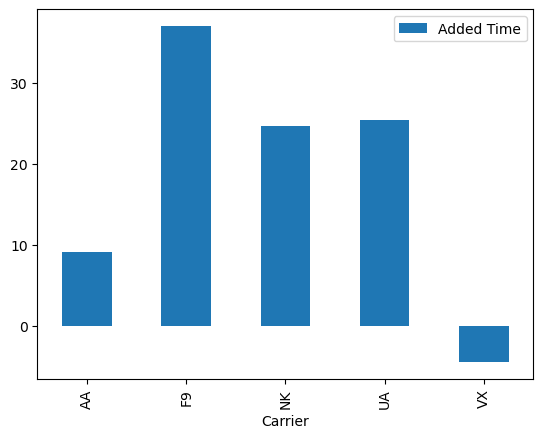

In [97]:
AirlineTime.plot(kind = 'bar', y = 'Added Time')
plt.show()